In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/canada_per_capita_income .csv')

In [4]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [5]:
df.shape

(47, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [7]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [8]:
df.isnull().sum()

,0
year,0
per capita income (US$),0


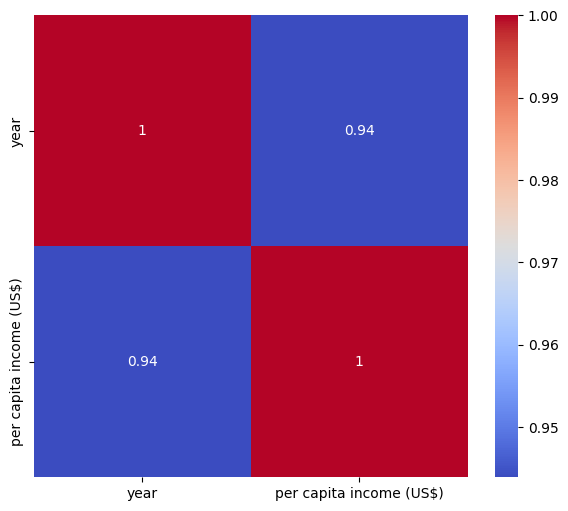

In [24]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Step 3: Define feature and target
X = df[['year']]  # Feature
y = df['per capita income (US$)']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.score(X_train, y_train)

0.8933611556121919

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2_train = model.score(X_train, y_train)  # Training accuracy
r2_test = model.score(X_test, y_test)

In [21]:
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Training Accuracy (R²):", r2_train)
print("Validation Accuracy (R²):", r2_test)

Model Coefficient: [815.14251301]
Model Intercept: -1605560.1987964255
Mean Squared Error: 15147815.5477862
Training Accuracy (R²): 0.8933611556121919
Validation Accuracy (R²): 0.8751771396846304


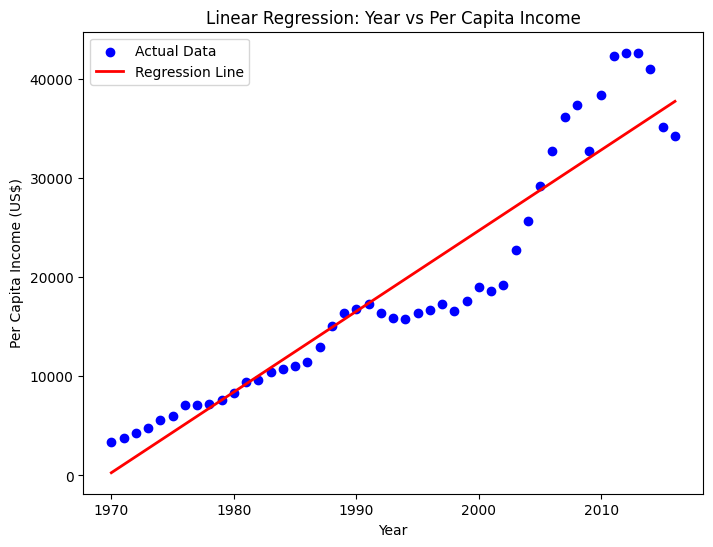

In [25]:
# Step 9: Plot regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Linear Regression: Year vs Per Capita Income')
plt.legend()
plt.show()